In [31]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
# Dealing with different types of data - ordinal, categorical, encoding

# Sample of ordinal data
age_categories = ['child', 'teenager', 'young adult', 'adult', 'senior']

# Sample of categorical data
gender_categories = ['male', 'female', 'other']

# Example of encoding
label_encoder = LabelEncoder()
gender_encoded = label_encoder.fit_transform(['male', 'female', 'male', 'other'])


In [21]:
# Collecting, storing, and making data ready for processing

# Collecting data using pandas
data = pd.read_csv('cereals.csv')

# Display the first few rows of the DataFrame
print(data.head())

# print(data.columns)
# print(data.dtypes)

                         Name Manuf Type  Calories  Protein  Fat  Sodium  \
0                  100%_Bran     N    C         70        4    1     130   
1          100%_Natural_Bran     Q    C        120        3    5      15   
2                   All-Bran     K    C         70        4    1     260   
3  All-Bran_with_Extra_Fiber     K    C         50        4    0     140   
4             Almond_Delight     R    C        110        2    2     200   

   Fiber  Carbo  Sugars  ...  Weight  Cups     Rating  Cold  Nabisco  Quaker  \
0   10.0    5.0     6.0  ...     1.0  0.33  68.402973     1        1       0   
1    2.0    8.0     8.0  ...     1.0  1.00  33.983679     1        0       1   
2    9.0    7.0     5.0  ...     1.0  0.33  59.425505     1        0       0   
3   14.0    8.0     0.0  ...     1.0  0.50  93.704912     1        0       0   
4    1.0   14.0     8.0  ...     1.0  0.75  34.384843     1        0       0   

   Kelloggs  GeneralMills  Ralston  AHFP  
0         0        

In [15]:
# Create the DataFrame
processed_data = pd.DataFrame({
    'Name': ['John Doe', 'Peter Johnson', 'Sarah Smith'],
    'Email Address': ['johndoe@gmail.com', 'peterjohnson@yahoo.com', 'sarah@gmail.com']
})

# Store data
processed_data.to_csv('processed_data',index=False)

# Read processed data
read_data=pd.read_csv('processed_data')

print(read_data.head())

            Name           Email Address
0       John Doe       johndoe@gmail.com
1  Peter Johnson  peterjohnson@yahoo.com
2    Sarah Smith         sarah@gmail.com


In [32]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Display the first few rows of the DataFrame
print(numeric_data.head())

# Example of making data ready for processing - feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_data = scaled_data[~np.isnan(scaled_data).any(axis=1)]

print('-------------------------------------------------------')
print("Mean:", scaled_data.mean(axis=0))
print("Standard Deviation:", scaled_data.std(axis=0))
print("Minimum:", scaled_data.min(axis=0))
print("Maximum:", scaled_data.max(axis=0))


   Calories  Protein  Fat  Sodium  Fiber  Carbo  Sugars  Potass  Vitamins  \
0        70        4    1     130   10.0    5.0     6.0   280.0        25   
1       120        3    5      15    2.0    8.0     8.0   135.0         0   
2        70        4    1     260    9.0    7.0     5.0   320.0        25   
3        50        4    0     140   14.0    8.0     0.0   330.0        25   
4       110        2    2     200    1.0   14.0     8.0     NaN        25   

   Shelf  Weight  Cups     Rating  Cold  Nabisco  Quaker  Kelloggs  \
0      3     1.0  0.33  68.402973     1        1       0         0   
1      3     1.0  1.00  33.983679     1        0       1         0   
2      3     1.0  0.33  59.425505     1        0       0         1   
3      3     1.0  0.50  93.704912     1        0       0         1   
4      3     1.0  0.75  34.384843     1        0       0         0   

   GeneralMills  Ralston  AHFP  
0             0        0     0  
1             0        0     0  
2             0  

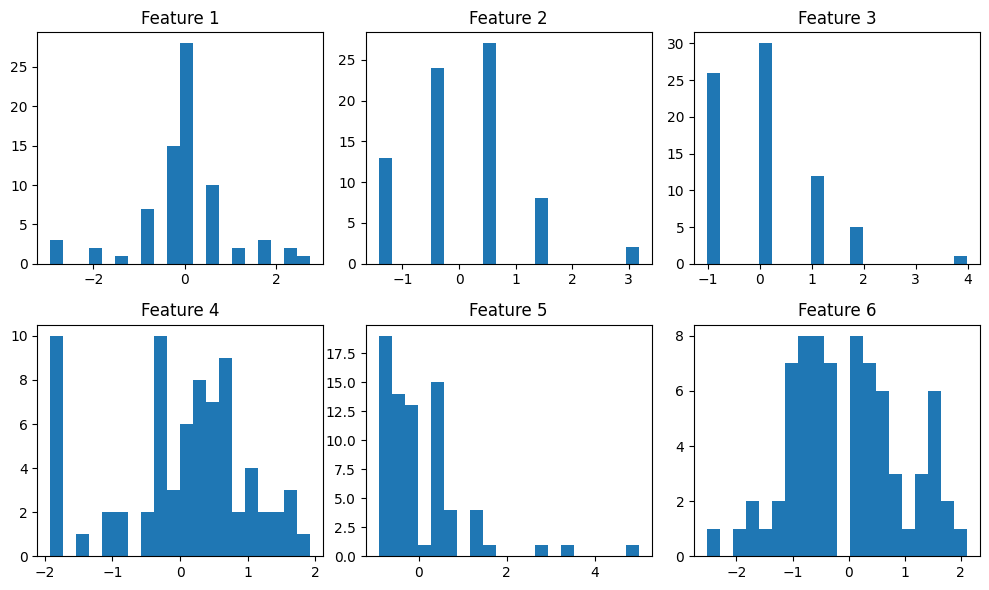

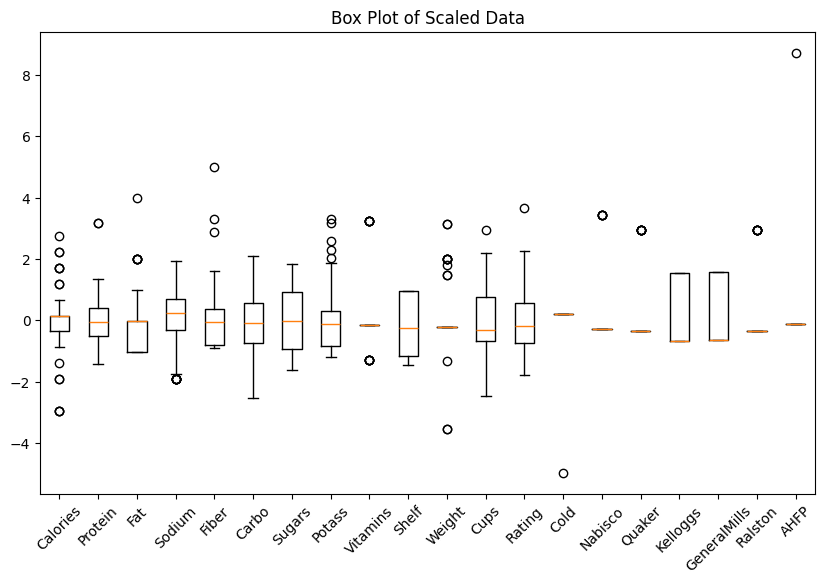

In [34]:
# Histograms of scaled data
plt.figure(figsize=(10, 6))
for i in range(min(scaled_data.shape[1], 6)):  # Limit to 6 subplots
    plt.subplot(2, 3, i+1)
    plt.hist(scaled_data[:, i], bins=20)
    plt.title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

# Box plots of scaled data
plt.figure(figsize=(10, 6))
plt.boxplot(scaled_data, labels=numeric_data.columns)
plt.title('Box Plot of Scaled Data')
plt.xticks(rotation=45)
plt.show()